In [ ]:
import tensorflow as tf
from tensorflow import keras

## Load Fashion MNIST dataset

In [ ]:
fashion_MNIST = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_MNIST.load_data()

## Check Shape of Train dataset

In [ ]:
y_train_full.shape

(60000,)

## Split Validation and Train dataset and convert into 28 X 28 size

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
X_test = X_test / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Fashion Class Name

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Check Class Name for first data

In [ ]:
class_names[y_train[1]]

'T-shirt/top'

## Creating the model using the Sequential API

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Check model layers and Weights

In [ ]:
print(model.layers)

# hidden layer 1
hidden1 = model.layers[1]

# print hidden layer 1 weights, biases
weight, bias = hidden1.get_weights()
print(weight.shape)

# print hidden layer 1  biases
print(bias.shape)

[<tensorflow.python.keras.layers.core.Flatten object at 0x0000023D75088A90>, <tensorflow.python.keras.layers.core.Dense object at 0x0000023D7511F820>, <tensorflow.python.keras.layers.core.Dense object at 0x0000023D84C61EE0>, <tensorflow.python.keras.layers.core.Dense object at 0x0000023D7514E730>]
(784, 300)
(300,)


## Compile Model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Fit model

In [69]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7236 - accuracy: 0.7623 - val_loss: 0.5091 - val_accuracy: 0.8316
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4915 - accuracy: 0.8277 - val_loss: 0.4566 - val_accuracy: 0.8474
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4436 - accuracy: 0.8449 - val_loss: 0.4057 - val_accuracy: 0.8646
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4153 - accuracy: 0.8549 - val_loss: 0.3970 - val_accuracy: 0.8636
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8619 - val_loss: 0.3936 - val_accuracy: 0.8604


## Plot Training and Validation in plot

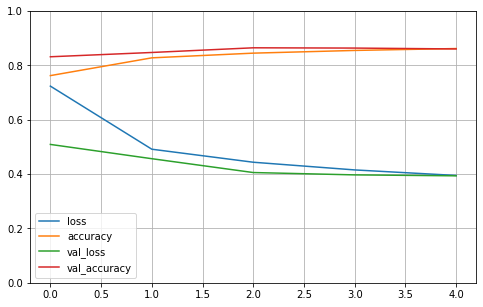

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


## Evaluate Model

In [71]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8451


[0.43112051486968994, 0.8450999855995178]

## Prediction

In [72]:
X_new = X_train[:3]
y_predict = model.predict(X_new)
print(y_predict.round(2))
print(y_train[:3])

[[0.   0.   0.14 0.   0.52 0.   0.34 0.   0.01 0.  ]
 [0.81 0.   0.01 0.   0.   0.   0.18 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.89 0.   0.08]]
[4 0 7]


In [73]:
y_pred = model.predict_classes(X_new)
print(y_pred)

[4 0 7]


# Building Complex Models Using the Functional API

In [74]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.Model(inputs=[input_], outputs=[output])

In [75]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model2 = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


ValueError: in user code:

    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\vk006\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:155 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_2 expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 5, 28) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 26, 28) dtype=float32>]


## Saving and Restoring a Model

In [ ]:
model.save('model/fashion.h5')

## Using Callbacks

In [ ]:
# Save model check points while training
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/fashion.h5", save_best_only=True)

# Early stopping callbacks  
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, verbose=1)

# Log training in CSVLogger
csv_logger_cb = keras.callbacks.CSVLogger("logs/fashion.log", separator=",", append=True)

# CUstom class callbacks
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb, csv_logger_cb, PrintValTrainRatioCallback()])

Epoch 1/10
1718/1719 [============================>.] - ETA: 0s - loss: 0.1915 - accuracy: 0.9320
val/train: 1.51
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1916 - accuracy: 0.9319 - val_loss: 0.2885 - val_accuracy: 0.8936
Epoch 2/10
1700/1719 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9323
val/train: 1.48
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1892 - accuracy: 0.9322 - val_loss: 0.2800 - val_accuracy: 0.9008
Epoch 3/10
1717/1719 [============================>.] - ETA: 0s - loss: 0.1856 - accuracy: 0.9342
val/train: 1.61
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1856 - accuracy: 0.9342 - val_loss: 0.2989 - val_accuracy: 0.8962
Epoch 4/10
1716/1719 [============================>.] - ETA: 0s - loss: 0.1827 - accuracy: 0.9341
val/train: 1.59
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1827 - accuracy: 0.9342 - val_loss: 0.2899 - val_accuracy: 0.8944
Epoch 5/10
1

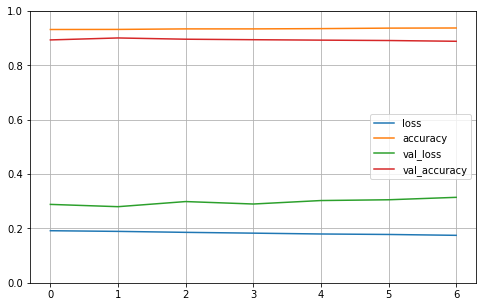

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Using TensorBoard for Visualization

In [80]:
import os
root_logdir = os.path.join(os.curdir, "logs", "tensorboard")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
    
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [83]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/10


TypeError: 'NoneType' object is not callable

In [ ]:
import numpy as np
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [59]:
%load_ext tensorboard


'.\\logs\\tensorboard\\run_2021_12_11-20_34_56'

In [84]:
%tensorboard --logdir='./logs' --port=6006

UsageError: Line magic function `%tensorboard` not found.


## Fine-Tuning Neural Network Hyperparameters

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
"n_hidden": [0, 1, 2, 3],
"n_neurons": np.arange(1, 100),
"learning_rate": reciprocal(3e-4, 3e-2),
}

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
# Best parameters
rnd_search_cv.best_params_

In [ ]:
# Best MSE score
rnd_search_cv.best_score_

In [ ]:
# Model
model = rnd_search_cv.best_estimator_.model

## Glorot and He Initialization

In [ ]:
# He Normal
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

# Uniform distribution
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')


keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

In [ ]:
# Leaky RELU
keras.layers.LeakyReLU(alpha=0.2)

#SELU activation
layer = keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [ ]:
# Batch Normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
    ])

In [ ]:
# Gradient clipping
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)